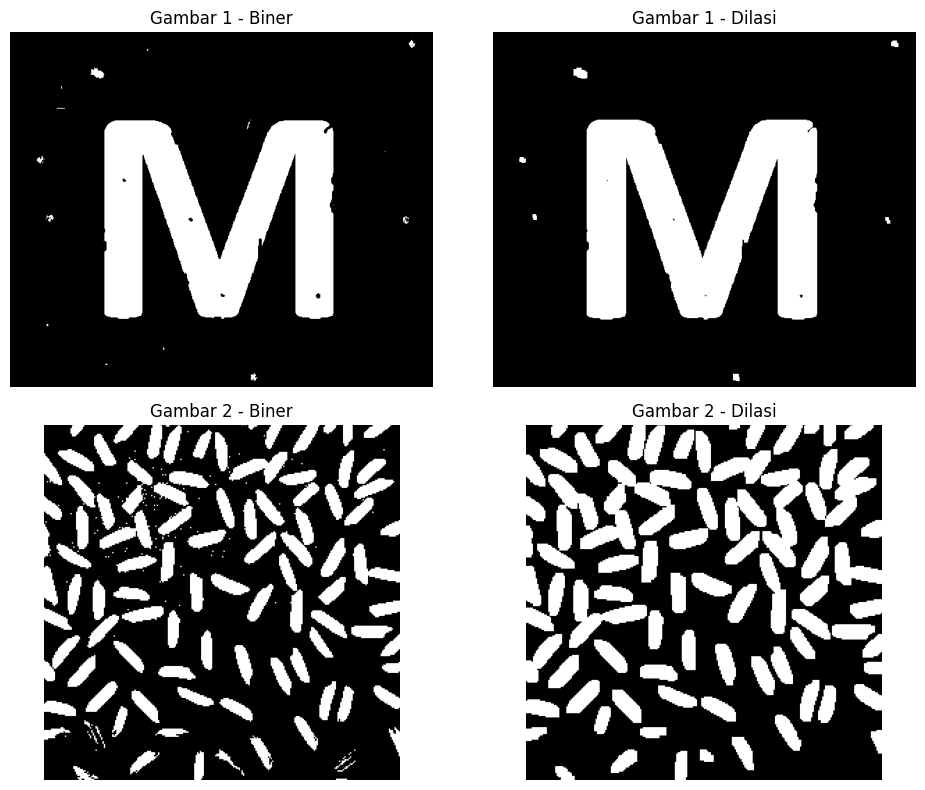

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ganti dengan path sesuai lokasi gambar kamu
paths = [
    "C:/Users/hp/Documents/tugascitradigital/1.png",
    "C:/Users/hp/Documents/tugascitradigital/2.png"
]

plt.figure(figsize=(10, 8))

for i, path in enumerate(paths):
    # Baca gambar grayscale
    img = cv2.imread(path, 0)

    if img is None:
        print(f"❌ Gambar {i+1} tidak ditemukan: {path}")
        continue

    # Threshold ke biner
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Kernel morfologi
    kernel = np.ones((3, 3), np.uint8)

    # Bersihkan noise kecil dengan opening (erosi → dilasi)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # Dilasi untuk melebarkan objek
    dilated = cv2.dilate(cleaned, kernel, iterations=1)

    # Tampilkan gambar biner & hasil dilasi
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(binary, cmap='gray')
    plt.title(f"Gambar {i+1} - Biner")
    plt.axis("off")

    plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(dilated, cmap='gray')
    plt.title(f"Gambar {i+1} - Dilasi")
    plt.axis("off")

plt.tight_layout()
plt.show()
